In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/yellow-tripdata-2025-01.csv")
data.head()

/tmp/ipython-input-4015353222.py:1: DtypeWarning: Columns (3,5,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/yellow-tripdata-2025-01.csv")


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-01-01 00:18:38.000000,2025-01-01 00:26:59.000000,1,1.60,1,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0,0.0
1,1,2025-01-01 00:32:40.000000,2025-01-01 00:35:13.000000,1,0.50,1,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0,0.0
2,1,2025-01-01 00:44:04.000000,2025-01-01 00:46:01.000000,1,0.60,1,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0,0.0
3,2,2025-01-01 00:14:27.000000,2025-01-01 00:20:01.000000,3,0.52,1,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0,0.0
4,2,2025-01-01 00:21:34.000000,2025-01-01 00:25:06.000000,3,0.66,1,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0,0.0


In [ ]:
url = f"https://docs.google.com/spreadsheets/d/1f6ShOIoTXAEZt9zyo-Nd-mBYqAB-KcbEqSKDQumOOu0/gviz/tq?tqx=out:csv&sheet=taxi_zone_lookup"

loc_data = pd.read_csv(url)
loc_data.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [ ]:
# Merge for pickup locations
data = data.merge(
    loc_data[['LocationID', 'Borough', 'Zone']],
    how='left',
    left_on='PULocationID',
    right_on='LocationID'
).rename(columns={'Borough': 'PUBorough', 'Zone': 'PUZone'}) \
 .drop(columns='LocationID')

# Merge for dropoff locations
data = data.merge(
    loc_data[['LocationID', 'Borough', 'Zone']],
    how='left',
    left_on='DOLocationID',
    right_on='LocationID'
).rename(columns={'Borough': 'DOBorough', 'Zone': 'DOZone'}) \
 .drop(columns='LocationID')

data.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,PUBorough,PUZone,DOBorough,DOZone
0,1,2025-01-01 00:18:38.000000,2025-01-01 00:26:59.000000,1,1.60,1,N,229,237,1,...,0.0,1.0,18.00,2.5,0.0,0.0,Manhattan,Sutton Place/Turtle Bay North,Manhattan,Upper East Side South
1,1,2025-01-01 00:32:40.000000,2025-01-01 00:35:13.000000,1,0.50,1,N,236,237,1,...,0.0,1.0,12.12,2.5,0.0,0.0,Manhattan,Upper East Side North,Manhattan,Upper East Side South
2,1,2025-01-01 00:44:04.000000,2025-01-01 00:46:01.000000,1,0.60,1,N,141,141,1,...,0.0,1.0,12.10,2.5,0.0,0.0,Manhattan,Lenox Hill West,Manhattan,Lenox Hill West
3,2,2025-01-01 00:14:27.000000,2025-01-01 00:20:01.000000,3,0.52,1,N,244,244,2,...,0.0,1.0,9.70,0.0,0.0,0.0,Manhattan,Washington Heights South,Manhattan,Washington Heights South
4,2,2025-01-01 00:21:34.000000,2025-01-01 00:25:06.000000,3,0.66,1,N,244,116,2,...,0.0,1.0,8.30,0.0,0.0,0.0,Manhattan,Washington Heights South,Manhattan,Hamilton Heights


In [ ]:
#removing rows where borough is unknown

unknown_boroughs = data[
    (data['PUBorough'] == 'Unknown') | (data['DOBorough'] == 'Unknown')
]

data.drop(unknown_boroughs.index, inplace=True)

print(f"Removed {len(unknown_boroughs)} rows with Unknown boroughs.")
print(f"Remaining rows: {len(data)}")

data.head()

Removed 16015 rows with Unknown boroughs.
Remaining rows: 3459211


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,PUBorough,PUZone,DOBorough,DOZone
0,1,2025-01-01 00:18:38.000000,2025-01-01 00:26:59.000000,1,1.60,1,N,229,237,1,...,0.0,1.0,18.00,2.5,0.0,0.0,Manhattan,Sutton Place/Turtle Bay North,Manhattan,Upper East Side South
1,1,2025-01-01 00:32:40.000000,2025-01-01 00:35:13.000000,1,0.50,1,N,236,237,1,...,0.0,1.0,12.12,2.5,0.0,0.0,Manhattan,Upper East Side North,Manhattan,Upper East Side South
2,1,2025-01-01 00:44:04.000000,2025-01-01 00:46:01.000000,1,0.60,1,N,141,141,1,...,0.0,1.0,12.10,2.5,0.0,0.0,Manhattan,Lenox Hill West,Manhattan,Lenox Hill West
3,2,2025-01-01 00:14:27.000000,2025-01-01 00:20:01.000000,3,0.52,1,N,244,244,2,...,0.0,1.0,9.70,0.0,0.0,0.0,Manhattan,Washington Heights South,Manhattan,Washington Heights South
4,2,2025-01-01 00:21:34.000000,2025-01-01 00:25:06.000000,3,0.66,1,N,244,116,2,...,0.0,1.0,8.30,0.0,0.0,0.0,Manhattan,Washington Heights South,Manhattan,Hamilton Heights


# data profile

In [ ]:
data.shape

(3459211, 24)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3459211 entries, 0 to 3475225
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        object 
 4   trip_distance          float64
 5   RatecodeID             object 
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   object 
 18  Airport_fee            object 
 19  cbd_congestion_fee     float64
 20  PUBorough              object 
 21  PUZone                 object 
 22  DOBorough              

we need to fix the data type of tpep_pickup_datetime , tpep_dropoff_datetime,passenger_count, congestion_surcharge,Airport_fee

# Data Cleaning

## check for missing values

In [ ]:
data.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,0
PULocationID,0
DOLocationID,0
payment_type,0


PUBorough and DOBorough have missing values

## Fix Data Type issues

In [ ]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], errors='coerce')


In [ ]:
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'],errors = 'coerce')

In [ ]:
data.dropna(subset = ['tpep_pickup_datetime','tpep_dropoff_datetime'],inplace = True)

In [ ]:
num_cols = ["passenger_count","congestion_surcharge" ,"Airport_fee"]
data[num_cols] = data[num_cols].apply(pd.to_numeric, errors='coerce')

##Fix Null Values

In [ ]:
data.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,539671
trip_distance,0
RatecodeID,0
store_and_fwd_flag,0
PULocationID,0
DOLocationID,0
payment_type,0


In [ ]:
mean_passenger_count = data["passenger_count"].mean()
data["passenger_count"].fillna(mean_passenger_count,inplace =True)

mean_congestion_surcharge = data["congestion_surcharge"].mean()
data["congestion_surcharge"].fillna(mean_congestion_surcharge,inplace = True)

mean_Airport_fee = data["Airport_fee"].mean()
data["Airport_fee"].fillna(mean_Airport_fee,inplace = True)

/tmp/ipython-input-27132928.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["passenger_count"].fillna(mean_passenger_count,inplace =True)
/tmp/ipython-input-27132928.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
null_fare_rows = data[data['PUBorough'].isnull()]
null_fare_rows.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,PUBorough,PUZone,DOBorough,DOZone
4459,1,2025-01-01 00:05:51,2025-01-01 00:06:29,1.0,0.00,5,N,265,265,1,...,0.00,1.0,451.00,0.0,0.0,0.0,NaN,Outside of NYC,NaN,Outside of NYC
6689,2,2025-01-01 01:01:20,2025-01-01 01:33:01,2.0,29.15,5,N,265,265,1,...,6.94,1.0,162.94,0.0,0.0,0.0,NaN,Outside of NYC,NaN,Outside of NYC


In [ ]:
outside_nyc = data[
    (data['PUZone'] == 'Outside of NYC') | (data['DOZone'] == 'Outside of NYC')
]

# Drop rows by index (no need to assign again if using inplace=True)
data.drop(outside_nyc.index, inplace=True)

# Check result
print(f"Removed {len(outside_nyc)} rows where pickup is from outside NYC.")
print(f"Remaining rows: {len(data)}")

data.head()

Removed 12342 rows where pickup is from outside NYC.
Remaining rows: 3446869


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,PUBorough,PUZone,DOBorough,DOZone
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1,N,229,237,1,...,0.0,1.0,18.00,2.5,0.0,0.0,Manhattan,Sutton Place/Turtle Bay North,Manhattan,Upper East Side South
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1,N,236,237,1,...,0.0,1.0,12.12,2.5,0.0,0.0,Manhattan,Upper East Side North,Manhattan,Upper East Side South
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1,N,141,141,1,...,0.0,1.0,12.10,2.5,0.0,0.0,Manhattan,Lenox Hill West,Manhattan,Lenox Hill West
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1,N,244,244,2,...,0.0,1.0,9.70,0.0,0.0,0.0,Manhattan,Washington Heights South,Manhattan,Washington Heights South
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1,N,244,116,2,...,0.0,1.0,8.30,0.0,0.0,0.0,Manhattan,Washington Heights South,Manhattan,Hamilton Heights


## Remove unwanted columns

In [ ]:
data= data.drop(columns=["RatecodeID",	"store_and_fwd_flag"], axis = 1)
data.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,PUBorough,PUZone,DOBorough,DOZone
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.6,229,237,1,10.0,3.5,...,0.0,1.0,18.00,2.5,0.0,0.0,Manhattan,Sutton Place/Turtle Bay North,Manhattan,Upper East Side South
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.5,236,237,1,5.1,3.5,...,0.0,1.0,12.12,2.5,0.0,0.0,Manhattan,Upper East Side North,Manhattan,Upper East Side South


## Remove Duplicates

In [ ]:
data.drop_duplicates()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,PUBorough,PUZone,DOBorough,DOZone
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.000000,1.60,229,237,1,10.00,3.5,...,0.0,1.0,18.00,2.500000,0.00000,0.00,Manhattan,Sutton Place/Turtle Bay North,Manhattan,Upper East Side South
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.000000,0.50,236,237,1,5.10,3.5,...,0.0,1.0,12.12,2.500000,0.00000,0.00,Manhattan,Upper East Side North,Manhattan,Upper East Side South
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.000000,0.60,141,141,1,5.10,3.5,...,0.0,1.0,12.10,2.500000,0.00000,0.00,Manhattan,Lenox Hill West,Manhattan,Lenox Hill West
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.000000,0.52,244,244,2,7.20,1.0,...,0.0,1.0,9.70,0.000000,0.00000,0.00,Manhattan,Washington Heights South,Manhattan,Washington Heights South
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.000000,0.66,244,116,2,5.80,1.0,...,0.0,1.0,8.30,0.000000,0.00000,0.00,Manhattan,Washington Heights South,Manhattan,Hamilton Heights
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475221,2,2025-01-17 18:56:42,2025-01-17 19:35:45,1.297585,0.00,75,186,0,34.63,0.0,...,0.0,1.0,39.38,2.225756,0.12434,0.75,Manhattan,East Harlem South,Manhattan,Penn Station/Madison Sq West
3475222,2,2025-01-17 18:14:52,2025-01-17 18:27:04,1.297585,0.00,161,230,0,-4.75,0.0,...,0.0,1.0,4.57,2.225756,0.12434,0.75,Manhattan,Midtown Center,Manhattan,Times Sq/Theatre District
3475223,2,2025-01-17 18:28:20,2025-01-17 18:36:28,1.297585,1.09,209,45,0,6.99,0.0,...,0.0,1.0,11.74,2.225756,0.12434,0.75,Manhattan,Seaport,Manhattan,Chinatown
3475224,2,2025-01-17 18:49:49,2025-01-17 19:05:20,1.297585,1.79,209,114,0,12.71,0.0,...,0.0,1.0,17.46,2.225756,0.12434,0.75,Manhattan,Seaport,Manhattan,Greenwich Village South


## Remove Outliers

In [ ]:
#removing data where data range is outside Jan 2025
outliers = data[(data['tpep_pickup_datetime'].dt.month != 1) | (data['tpep_pickup_datetime'].dt.year != 2025)]
data.drop(outliers.index, inplace=True)
data.shape

(3446847, 22)

In [ ]:
#removing rows where passenger count is are < 1 and >5
outliers = data[(data['passenger_count'] < 1) | (data['passenger_count'] > 5)]
data.drop(outliers.index, inplace=True)
data.shape

(3411022, 22)

In [ ]:
#removing rows where fare is 0
data= data[data['fare_amount'] > 0]
data.shape

(3266383, 22)

In [ ]:
#removing data of short trips
data = data[data['trip_distance'] > 1]
data.shape

(2399741, 22)

In [ ]:
#identifying outliers from trip distance and replacing with median value
outliers = data['trip_distance'] > 50
median_distance = data.loc[~outliers, 'trip_distance'].median()
data.loc[outliers, 'trip_distance'] = median_distance

# Data Transformation

## trip duration

In [ ]:
data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60
data['trip_duration'] = data['trip_duration'].astype(int)

In [ ]:
data = data[data["trip_duration"] > 2]
data.shape

(2397257, 23)

## pickup time category

In [ ]:
data['hour'] = data['tpep_pickup_datetime'].dt.hour

def get_time_of_day(hour):
    if 0 <= hour < 6:    #from 12pm till 6am
        return 'Midnight'
    elif 6 <= hour < 12:  #from 6am till 12 noon
        return 'Morning'
    elif 12 <= hour < 16:  #from 12 noon till 4pm
        return 'Noon'
    elif 16 <= hour < 20:   #from 4pm till 8pm
        return 'Evening'
    else:
        return 'Night'     #from 8pm till 12pm

data['time_category'] = data['hour'].apply(get_time_of_day)

In [ ]:
data[['tpep_pickup_datetime', 'hour', 'time_category']].head()

,tpep_pickup_datetime,hour,time_category
0,2025-01-01 00:18:38,0,Midnight
5,2025-01-01 00:48:24,0,Midnight
9,2025-01-01 00:00:02,0,Midnight
10,2025-01-01 00:20:28,0,Midnight
12,2025-01-01 00:42:40,0,Midnight


## day category

In [ ]:
# Extracting the name of the day
data['day_name'] = data['tpep_pickup_datetime'].dt.day_name()

data[['tpep_pickup_datetime', 'day_name']].head()


,tpep_pickup_datetime,day_name
0,2025-01-01 00:18:38,Wednesday
5,2025-01-01 00:48:24,Wednesday
9,2025-01-01 00:00:02,Wednesday
10,2025-01-01 00:20:28,Wednesday
12,2025-01-01 00:42:40,Wednesday


## distance category

In [ ]:
#classifying the distance as ranges
def get_distance_category(distance):
    if distance == 0:
        return 'No distance'
    elif 0 < distance < 2:
        return '<2 miles'
    elif 2 < distance <= 6:
        return '3–6 miles'
    elif 6 < distance <= 10:
        return '7–10 miles'
    else:
        return '> 10 miles'

data['distance_category'] = data['trip_distance'].apply(get_distance_category)


data[['trip_distance', 'distance_category']].head()

,trip_distance,distance_category
0,1.60,<2 miles
5,2.63,3–6 miles
9,1.71,<2 miles
10,2.29,3–6 miles
12,1.99,<2 miles


## Average speed (miles per hour)


In [ ]:
data['speed'] = data['trip_distance'] / (data['trip_duration'] / 60).round(2)

In [ ]:
#checking if speed is beyond the range
speed_check = data[(data['speed'] < 5) | (data['speed'] > 70)]
speed_check.shape

(57663, 28)

In [ ]:
#capping the speed values so that anything below the minimum typical NYC yellow taxi speed is set to that minimum, and anything above the maximum allowed speed is set to that maximum
min_speed = 5
max_speed = 70
data['speed'] = data['speed'].apply(lambda x: min_speed if x < min_speed else (max_speed if x > max_speed else x))
data[['trip_distance', 'trip_duration', 'speed']].head()

,trip_distance,trip_duration,speed
0,1.60,8,12.307692
5,2.63,20,7.969697
9,1.71,9,11.400000
10,2.29,7,19.083333
12,1.99,12,9.950000


In [ ]:
# Recalculating trip_duration to match the capped speed
data['trip_duration'] = (data['trip_distance'] / data['speed']) * 60

In [ ]:
# Updating dropoff datetime based on new duration
data['tpep_dropoff_datetime'] = data['tpep_pickup_datetime'] + pd.to_timedelta(data['trip_duration'], unit='m')

## payment category

In [ ]:
data['payment_type'] = data['payment_type'].map({
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown'
})

#EDA

##Pickup Hours

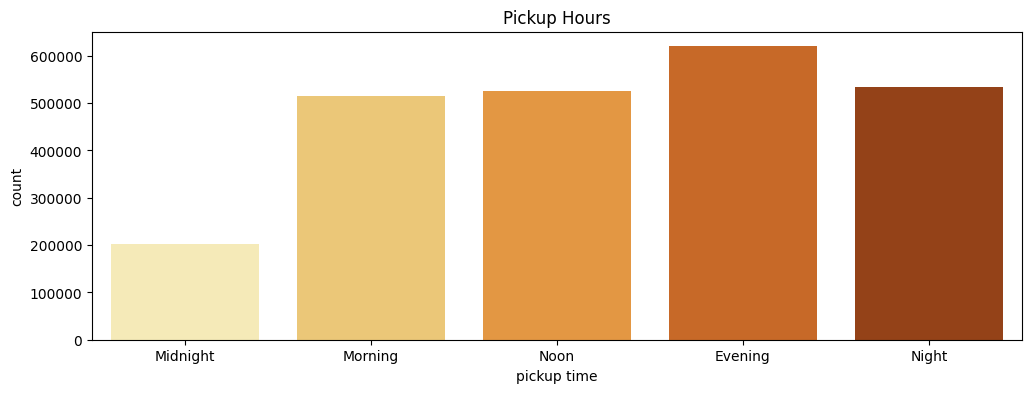

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(x= 'time_category', data = data, palette = "YlOrBr", hue= "time_category")
plt.xlabel("pickup time")
plt.title("Pickup Hours")
plt.show()

**Observation:**


1.   Most rides occur in the Evening.
2.   Midnight has the fewest rides, suggesting low demand or driver inactivity.

**Problem:**

High demand in Evening may lead to longer wait times if driver availability is not sufficient.

**Solution:**

Offering driver bonuses for operating in Evening peak hours can solve this issue.

##Top Pickup Zones

In [ ]:
top5_puzones = data['PUZone'].value_counts().head(5).reset_index()
print(top5_puzones)

                         PUZone   count
0                   JFK Airport  126115
1                Midtown Center  114627
2         Upper East Side North   98354
3         Upper East Side South   95258
4  Penn Station/Madison Sq West   84500


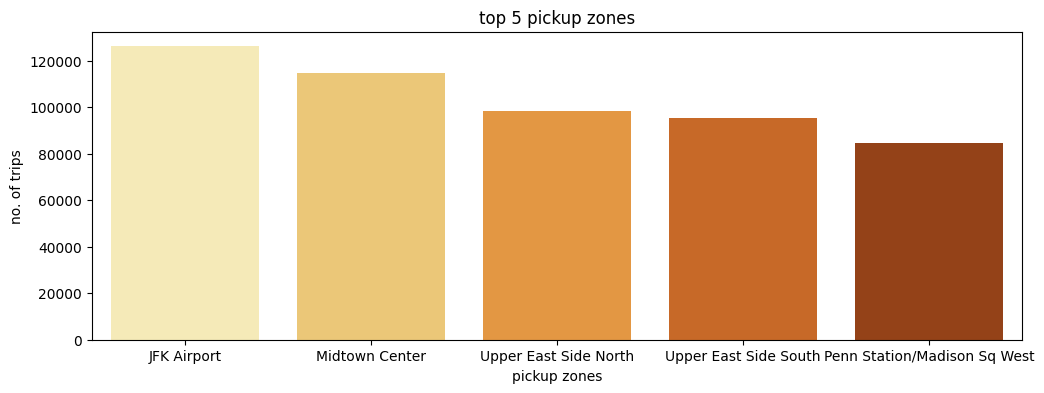

In [ ]:
plt.figure(figsize=(12, 4))
sns.barplot(x = 'PUZone',y = 'count',data =top5_puzones,palette= "YlOrBr" )
plt.title("top 5 pickup zones")
plt.xlabel("pickup zones")
plt.ylabel("no. of trips")
plt.show()

**Observation:**

The highest taxi activity occurs in transportation hubs like JFK Airport and Penn Station, and central Manhattan areas like Midtown, Upper East Side, suggesting that both commuters and travelers heavily rely on taxis in these areas

##Trip Fare vs Distance

In [ ]:
avg_fare_dist = data.groupby('trip_distance')['fare_amount'].mean().reset_index()
avg_fare_dist.head(2)

,trip_distance,fare_amount
0,1.01,9.195732
1,1.02,9.235933


<Figure size 1200x600 with 0 Axes>

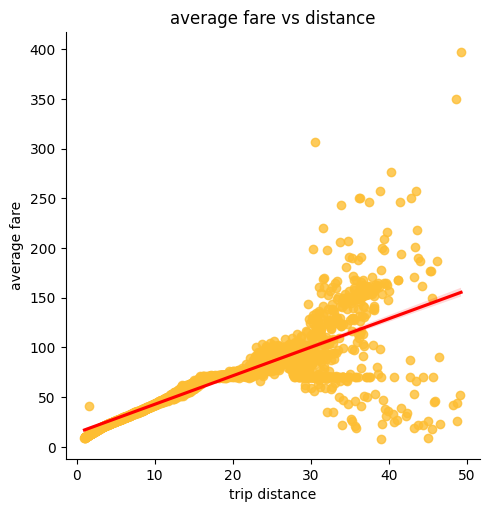

In [ ]:
plt.figure(figsize=(12, 6))
sns.lmplot(x= 'trip_distance', y= 'fare_amount', data= avg_fare_dist, line_kws = {'color': 'red'},  scatter_kws={'color': '#FDBE33'})
plt.title("average fare vs distance")
plt.xlabel("trip distance")
plt.ylabel("average fare")
plt.show()

**Observation:**


1.   The plot clearly shows a strong positive correlation suggesting longer trips have higher fares.
2.   The trend line fits well, though some scatter is visible at long distances.

**Interpretation:**

Fare increases linearly with trip distance, which confirms the taxi pricing structure

##Trip Patterns by Day and Hour

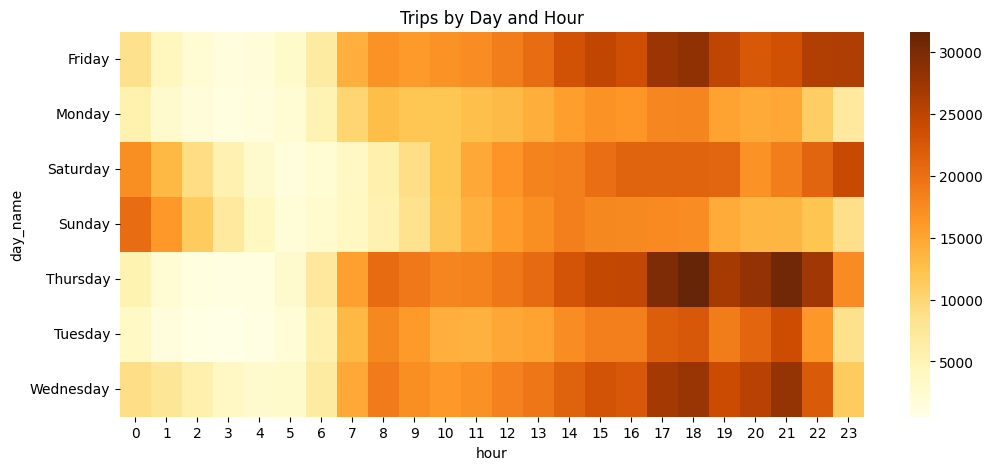

In [ ]:
hourly = data.groupby(['day_name','hour']).size().unstack()
plt.figure(figsize=(12,5))
sns.heatmap(hourly, cmap='YlOrBr')
plt.title('Trips by Day and Hour')
plt.show()

**Observation:**


1.   Weekdays (especially Thursday and Friday) show the highest trip density during evening hours (5–9 PM).
2.   Weekends (Saturday, Sunday) show moderate but steady demand spread throughout the day — likely for leisure travel.
3. Early mornings (1–5 AM) remain consistently low across all days.

##Passenger Payment Mode

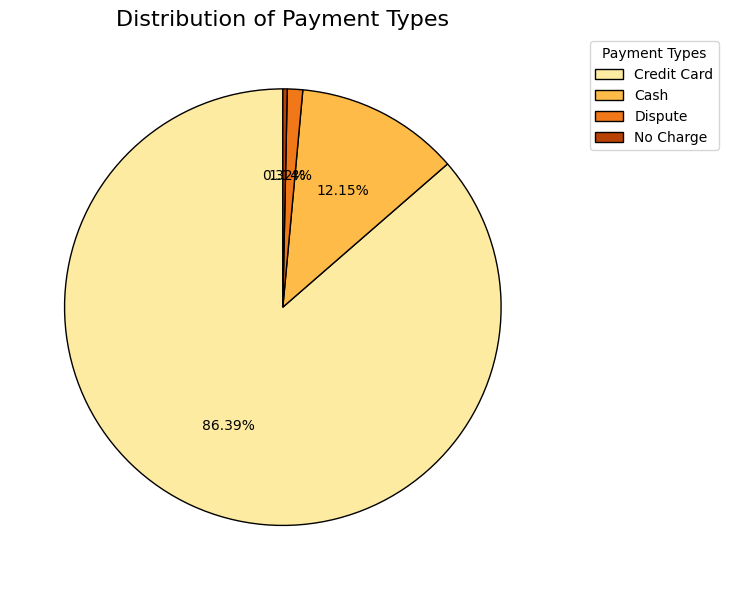

In [ ]:
payment_counts = data['payment_type'].value_counts()

colors = sns.color_palette("YlOrBr", n_colors=len(payment_counts))

plt.figure(figsize=(12, 6))
plt.pie(
    payment_counts,
    autopct='%1.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)
plt.legend(
    payment_counts.index,
    title="Payment Types",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)
plt.title('Distribution of Payment Types', fontsize=16)
plt.tight_layout()
plt.show()


**Observation:**

About 86.4% of passengers prefer to pay by credit card, while 12.1% prefer to pay in cash.

**Interpretation:**

This indicates that most passengers prefer online payment methods over cash transactions.

##Tips

Text(0.5, 1.0, 'Tip Amount by Hour of Day')

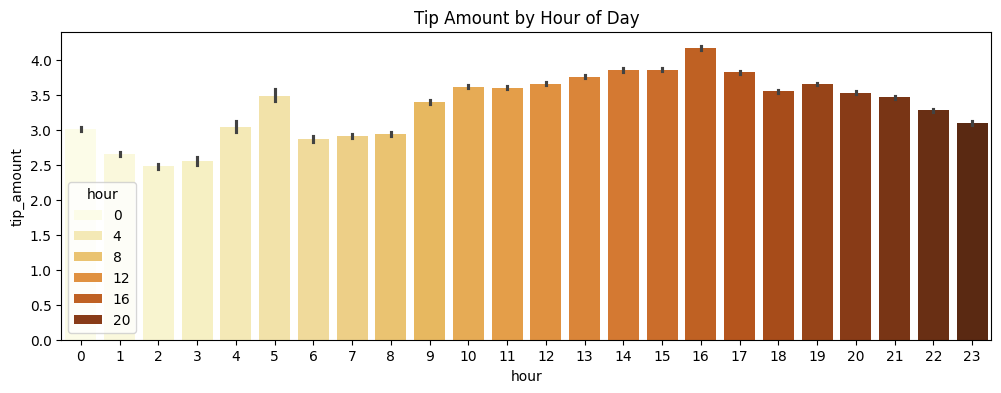

In [ ]:
plt.figure(figsize=(12, 4))
sns.barplot(x='hour', y='tip_amount', data=data, palette= "YlOrBr", hue = "hour")
plt.title("Tip Amount by Hour of Day")




**Observation:**


1.   The highest tipping period is around 3 PM–4 PM, with the average tip peaking at about $4.1. This could coincide with afternoon travel when business trips or airport transfers are common, which tend to have higher fares and tips.

2. After 5 PM, the tip amount starts to decline gradually through the evening and late night, stabilizing around $3.0 – $3.2 by 10 PM–midnight.

**Inference:**

Tips seems to peak in mid to late afternoon, possibly linked to higher fare amounts

##Taxi Demand vs Availability in NYC Zones

In [ ]:
#finding highest demand gap
pickup_counts = data['PULocationID'].value_counts().rename('pickup_count')
dropoff_counts = data['DOLocationID'].value_counts().rename('dropoff_count')
zone_demand = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)


zone_demand['demand_gap'] = zone_demand['pickup_count'] - zone_demand['dropoff_count']
high_demand_zones = zone_demand.sort_values(by='demand_gap', ascending=False).head(10)

print(high_demand_zones)

     pickup_count  dropoff_count  demand_gap
132      126115.0        23897.0    102218.0
138       83977.0        29380.0     54597.0
186       84500.0        47938.0     36562.0
161      114627.0        81797.0     32830.0
162       80305.0        60752.0     19553.0
230       83399.0        66210.0     17189.0
114       38265.0        23887.0     14378.0
249       55448.0        42554.0     12894.0
237       95258.0        84169.0     11089.0
163       65340.0        54462.0     10878.0


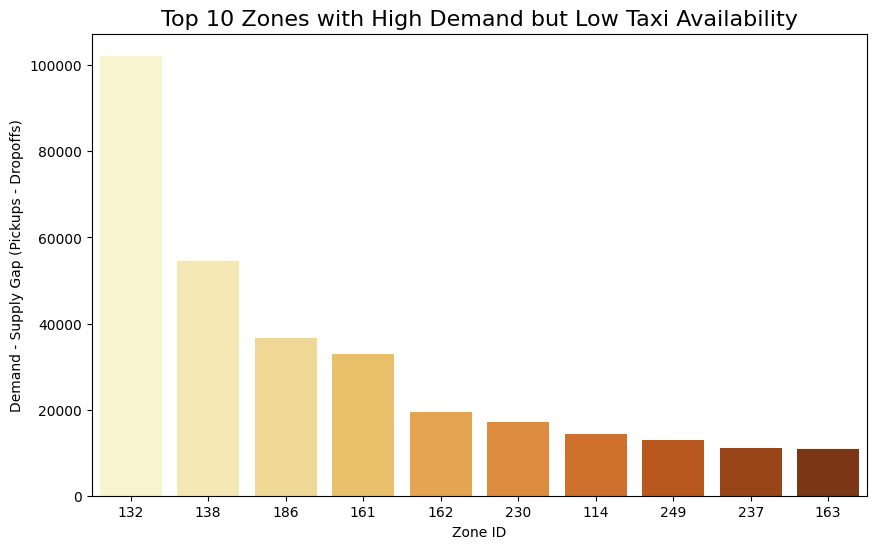

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=high_demand_zones.index.astype(str),
    y=high_demand_zones['demand_gap'],
    palette="YlOrBr"
)
plt.title("Top 10 Zones with High Demand but Low Taxi Availability", fontsize=16)
plt.xlabel("Zone ID")
plt.ylabel("Demand - Supply Gap (Pickups - Dropoffs)")
plt.show()

In [ ]:
zone_df = data[(data['PULocationID'] == 132) | (data['PULocationID'] == 138)|(data['PULocationID']==186)|(data['PULocationID'] == 161)|(data['PULocationID'] == 162)|(data['PULocationID'] == 230)|(data['PULocationID'] == 114)|(data['PULocationID'] == 249)|(data['PULocationID'] == 237)|(data['PULocationID'] == 163)]
zone_df[['PULocationID', 'PUZone']].drop_duplicates()

,PULocationID,PUZone
9,237,Upper East Side South
40,114,Greenwich Village South
50,249,West Village
73,161,Midtown Center
86,132,JFK Airport
106,162,Midtown East
116,138,LaGuardia Airport
140,163,Midtown North
439,186,Penn Station/Madison Sq West
6240,230,Times Sq/Theatre District


**Observation:**


1.   Zone JFK Airport shows the highest demand–supply gap (≈100,000 more pickups than dropoffs).
2.   Zones LaGuardia Airport,Penn Station/Madison Sq West, Midtown Center also show significant gaps but much smaller than JFK Airport.
3. After the top 4–5, the demand–supply difference levels off.

**Interpretation:**

1. These are pickup-heavy zones — passengers often start trips here but few trips end there.

2. These areas are mostly transport hubs (e.g., airports, stations) where people leave frequently but few return by taxi.

##Fare Changes Across Different Hours of a Day

In [ ]:
avg_fare_by_hour = data.groupby('hour')['fare_amount'].mean().reset_index()


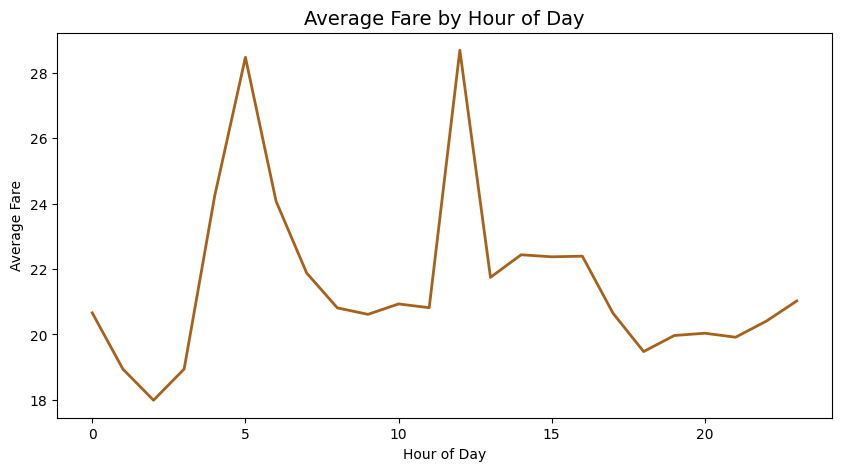

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='hour', y='fare_amount', data=avg_fare_by_hour, color='#a6611a', linewidth=2)
plt.title("Average Fare by Hour of Day", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Average Fare")
plt.show()

In [ ]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'cbd_congestion_fee',
       'PUBorough', 'PUZone', 'DOBorough', 'DOZone', 'trip_duration', 'hour',
       'time_category', 'day_name', 'distance_category', 'speed'],
      dtype='object')

**Observation:**

1. The fares peak around 5 AM and 12 PM (noon).

2. Fares are comparatively lower during late night and evening hours.

3. Early morning (5 AM) might show high fares due to airport rides or limited driver availability.

**Problem:**

Driver shortage during early morning — leading to surge pricing.

**Solution:**

More drivers should be encouraged to be active between 4–6 AM through incentive schemes.

##Traffic Intensity

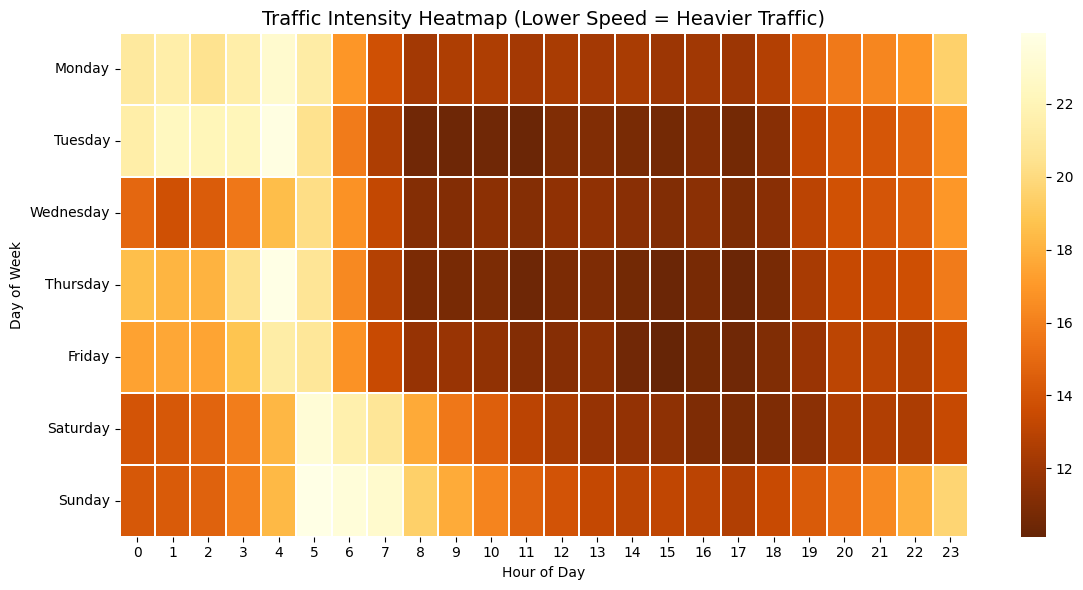

In [ ]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
traffic_heatmap = data.groupby(['day_name', 'hour'])['speed'].mean().unstack()
traffic_heatmap = traffic_heatmap.reindex(order)

plt.figure(figsize=(12, 6))
sns.heatmap(traffic_heatmap, cmap='YlOrBr_r', linewidths=0.2)
plt.title("Traffic Intensity Heatmap (Lower Speed = Heavier Traffic)", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()

**Monday**

1. There is a light traffic early morning (00–6 hrs).

2. Speeds drop sharply after 7 AM suggesting congested roads from 8 AM to 19 PM.

3. Slight improvement in traffic post 20:00.

**Tuesday–Friday**

1. Similar traffic pattern can be seen that is heavy congestion from 7 AM–19 PM.

2. Tuesday and Thursday appear darkest, suggesting worst traffic mid-week.
 These are likely peak commute days

**Saturday**

1. Minimal traffic in the early hours (0–6 AM)

2. Mild congestion can be seen around 10 AM–18 PM, but not as severe as weekdays.

**Sunday**

1. One of the lightest overall days.

2. Only mild congestion from noon to 6 PM.

##Taxi Demand In Boroughs

In [ ]:
borough_demand = data.groupby("PUBorough")["PULocationID"].count().reset_index()
borough_demand.columns = ["Borough", "Trips"]
borough_demand

,Borough,Trips
0,Bronx,12047
1,Brooklyn,51024
2,EWR,14
3,Manhattan,2080787
4,Queens,253208
5,Staten Island,177


In [ ]:
borough_coords = {
    "Manhattan": [40.7831, -73.9712],
    "Brooklyn": [40.6782, -73.9442],
    "Queens": [40.7282, -73.7949],
    "Bronx": [40.8448, -73.8648],
    "Staten Island": [40.5795, -74.1502]
}

borough_demand = borough_demand[borough_demand["Borough"].isin(borough_coords.keys())]

borough_demand["lat"] = borough_demand["Borough"].map(lambda x: borough_coords[x][0])
borough_demand["lon"] = borough_demand["Borough"].map(lambda x: borough_coords[x][1])

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(
    borough_demand,
    lat="lat",
    lon="lon",
    size="Trips",
    color="Borough",
    hover_name="Borough",
    hover_data={"Trips": True},
    size_max=70,
    zoom=9,
    mapbox_style="carto-positron",
    title="NYC Taxi Demand by Borough"
)

fig.show()

**Observation:**

1. Taxi demand is highly concentrated in Manhattan indicating economic and touristic centrality.

2. Queens’ demand spike is driven mostly by airport activity.

3. Outer boroughs (Bronx, Brooklyn, Staten Island) have low relative taxi dependency possibly due to better subway/bus coverage and distance from central business areas.